In [43]:
pip install obsei dateparser

In [44]:
pip install obsei[YoutubeScrapperSource]

In [45]:
pip install obsei[YoutubeScrapperConfig]

In [46]:
from obsei.source.youtube_scrapper import YoutubeScrapperSource, YoutubeScrapperConfig


from obsei.analyzer.classification_analyzer import (
    ClassificationAnalyzerConfig,
    ZeroShotClassificationAnalyzer,
)

In [47]:
video_url = input('Input the url')

Input the urlhttps://www.youtube.com/watch?v=YP6ZJnis-TY


In [48]:
source_config = YoutubeScrapperConfig(
    video_url= video_url,
    fetch_replies=False,
    max_comments=30,
    lookup_period="2Y",
)

In [49]:
source = YoutubeScrapperSource()

source_response_list = source.lookup(source_config)

In [50]:
for idx, source_response in enumerate(source_response_list):
    print(f"source_response#'{idx}'='{source_response.__dict__}'")

source_response#'0'='{'segmented_data': {}, 'meta': {'comment_id': 'Ugwas1yDsUZtFIQho4B4AaABAg', 'text': 'Fan Ronaldo\nPlease like, comment and share the match\r\nSupport me by visiting my sports store 👉  https://soccerjersey.us/', 'time': datetime.datetime(2023, 11, 24, 19, 54, 37, 307274, tzinfo=datetime.timezone.utc), 'author': '@nhtechofficial', 'channel': 'UC-lJV_hvjzUsc8NARZDLi6Q', 'votes': '148', 'photo': 'https://yt3.ggpht.com/okKTrt6ldJgB4nAmIzCWqBUDXYllVazWRzIEEbmEV4PHkBCWacKVKSeu-Dd4VyakRwVEejMV=s176-c-k-c0x00ffffff-no-rj', 'heart': True}, 'source_name': 'YoutubeScrapper', 'processed_text': 'Fan Ronaldo\nPlease like, comment and share the match\r\nSupport me by visiting my sports store 👉  https://soccerjersey.us/'}'
source_response#'1'='{'segmented_data': {}, 'meta': {'comment_id': 'UgxbJljBWUZExxp3izl4AaABAg', 'text': 'Cristiano Ronaldo is still young 💪💪💪', 'time': datetime.datetime(2023, 11, 24, 20, 54, 37, 308811, tzinfo=datetime.timezone.utc), 'author': '@user-ei4bm3om9z

In [51]:
text_analyzer = ZeroShotClassificationAnalyzer(
    model_name_or_path="typeform/mobilebert-uncased-mnli", device="auto"
)

In [52]:
analyzer_response_list = text_analyzer.analyze_input(
    source_response_list=source_response_list,
    analyzer_config=ClassificationAnalyzerConfig(
        labels=["positive", "negative"],
    ),
)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [53]:
for idx, an_response in enumerate(analyzer_response_list):
    print(f"analyzer_response#'{idx}'='{an_response.__dict__}'")

analyzer_response#'0'='{'segmented_data': {'classifier_data': {'positive': 0.9007318019866943, 'negative': 0.0007087295525707304}}, 'meta': {'comment_id': 'Ugwas1yDsUZtFIQho4B4AaABAg', 'text': 'Fan Ronaldo\nPlease like, comment and share the match\r\nSupport me by visiting my sports store 👉  https://soccerjersey.us/', 'time': datetime.datetime(2023, 11, 24, 19, 54, 37, 307274, tzinfo=datetime.timezone.utc), 'author': '@nhtechofficial', 'channel': 'UC-lJV_hvjzUsc8NARZDLi6Q', 'votes': '148', 'photo': 'https://yt3.ggpht.com/okKTrt6ldJgB4nAmIzCWqBUDXYllVazWRzIEEbmEV4PHkBCWacKVKSeu-Dd4VyakRwVEejMV=s176-c-k-c0x00ffffff-no-rj', 'heart': True}, 'source_name': 'YoutubeScrapper', 'processed_text': 'Fan Ronaldo\nPlease like, comment and share the match\r\nSupport me by visiting my sports store 👉  https://soccerjersey.us/'}'
analyzer_response#'1'='{'segmented_data': {'classifier_data': {'negative': 0.7565843462944031, 'positive': 0.6035071015357971}}, 'meta': {'comment_id': 'UgxbJljBWUZExxp3izl4Aa

In [54]:
from pandas import DataFrame
from obsei.sink.pandas_sink import PandasSink, PandasSinkConfig

sink_config = PandasSinkConfig(
   dataframe=DataFrame()
)
sink = PandasSink()

In [55]:
dataframe = sink.send_data(analyzer_response_list, sink_config)


/usr/local/lib/python3.10/dist-packages/obsei/sink/pandas_sink.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  config.dataframe = config.dataframe.append(responses)


In [56]:
dataframe

,processed_text,segmented_data_classifier_data_positive,segmented_data_classifier_data_negative,meta_comment_id,meta_text,meta_time,meta_author,meta_channel,meta_votes,meta_photo,meta_heart,source_name
0,"Fan Ronaldo\nPlease like, comment and share th...",0.90,0.00,Ugwas1yDsUZtFIQho4B4AaABAg,"Fan Ronaldo\nPlease like, comment and share th...",2023-11-24 19:54:37.307274+00:00,@nhtechofficial,UC-lJV_hvjzUsc8NARZDLi6Q,148,https://yt3.ggpht.com/okKTrt6ldJgB4nAmIzCWqBUD...,True,YoutubeScrapper
1,Cristiano Ronaldo is still young 💪💪💪,0.60,0.76,UgxbJljBWUZExxp3izl4AaABAg,Cristiano Ronaldo is still young 💪💪💪,2023-11-24 20:54:37.308811+00:00,@user-ei4bm3om9z,UCPYPS-rcfoKykJAsxMLZxfA,587,https://yt3.ggpht.com/ytc/APkrFKZ-njxM0896a8NR...,False,YoutubeScrapper
2,1st goal was incredible \n2nd goal was unstopp...,0.96,0.00,Ugw67DEKz3D7L26vEK54AaABAg,1st goal was incredible \n2nd goal was unstopp...,2023-11-24 20:54:37.310231+00:00,@zakariaismail2258,UC3LVgbG5ZQ9Q2gZj-qT0xYA,562,https://yt3.ggpht.com/ytc/APkrFKaFauiyJrRc5QPz...,False,YoutubeScrapper
3,The second goal for Ronaldo was insane,0.00,0.87,Ugy6wiJzaLMkGC78-xd4AaABAg,The second goal for Ronaldo was insane,2023-11-24 20:54:37.311604+00:00,@Panachaps1009,UCTTsy76G7NFXuctSHNxMe_w,223,https://yt3.ggpht.com/MfTrFeH8FmreXjqkpugAglAf...,False,YoutubeScrapper
4,The 2 goals he scored tonight seems impossible...,0.02,0.71,Ugz4gwKEPorQS44oiPR4AaABAg,The 2 goals he scored tonight seems impossible...,2023-11-24 20:54:37.312927+00:00,@wahabtoheeb,UCGcY0Tm4-0HqJwN96MKxuzQ,288,https://yt3.ggpht.com/VJW2olKcAhsSoE1A-gg5NJFb...,False,YoutubeScrapper
5,"Whenever I watch CR7 play, I always remember m...",0.92,0.00,UgyzDB8FqgJuqmdLNiB4AaABAg,"Whenever I watch CR7 play, I always remember m...",2023-11-24 22:54:37.314273+00:00,@richardmangoro2285,UCYVnYyYxr679x-5fm7eyP3g,92,https://yt3.ggpht.com/ytc/APkrFKboyNqha1BfhkII...,False,YoutubeScrapper
6,14 matches 15 goals and 7 assists this season ...,0.70,0.01,UgzqWVMUrzpNM--ZTfd4AaABAg,14 matches 15 goals and 7 assists this season ...,2023-11-24 22:54:37.315621+00:00,@ayaanqadri6191,UCE3PSl5lkFclIXCvG84U05A,89,https://yt3.ggpht.com/ytc/APkrFKZcRtotj1PNRDcH...,False,YoutubeScrapper
7,This young guy still scoring bangers 🔥 what a ...,0.98,0.00,Ugz9QHkecebOldfqtUJ4AaABAg,This young guy still scoring bangers 🔥 what a ...,2023-11-24 20:54:37.316969+00:00,@Erandi9,UCkmjAA3SAFcjl64BZP8mXqg,70,https://yt3.ggpht.com/ytc/APkrFKY7NZG-YNsB-W2u...,False,YoutubeScrapper
8,The best player in the world 🔥\n CR7🐏,0.95,0.00,UgyWd82ItskytqNC5vJ4AaABAg,The best player in the world 🔥\n CR7🐏,2023-11-24 20:54:37.318277+00:00,@i._.Chabota,UCWR-Q0N92i4TXQtfFihYF_w,61,https://yt3.ggpht.com/UACpa-7yVHdkn7QcPDQH9XAL...,False,YoutubeScrapper
9,Ronaldo is incredibly the greatest ! No one sh...,0.97,0.02,UgyuIM_h0ejrDYtjxkF4AaABAg,Ronaldo is incredibly the greatest ! No one sh...,2023-11-24 20:54:37.319628+00:00,@afam9561,UCLs3ZfDp8WjXNDEA_zTEYfQ,242,https://yt3.ggpht.com/ytc/APkrFKY39-X3csqzmmwX...,False,YoutubeScrapper


In [57]:
import pandas as pd

In [58]:
dataframe.loc[dataframe['segmented_data_classifier_data_negative'].astype('float')>0.5]

,processed_text,segmented_data_classifier_data_positive,segmented_data_classifier_data_negative,meta_comment_id,meta_text,meta_time,meta_author,meta_channel,meta_votes,meta_photo,meta_heart,source_name
1,Cristiano Ronaldo is still young 💪💪💪,0.60,0.76,UgxbJljBWUZExxp3izl4AaABAg,Cristiano Ronaldo is still young 💪💪💪,2023-11-24 20:54:37.308811+00:00,@user-ei4bm3om9z,UCPYPS-rcfoKykJAsxMLZxfA,587,https://yt3.ggpht.com/ytc/APkrFKZ-njxM0896a8NR...,False,YoutubeScrapper
3,The second goal for Ronaldo was insane,0.00,0.87,Ugy6wiJzaLMkGC78-xd4AaABAg,The second goal for Ronaldo was insane,2023-11-24 20:54:37.311604+00:00,@Panachaps1009,UCTTsy76G7NFXuctSHNxMe_w,223,https://yt3.ggpht.com/MfTrFeH8FmreXjqkpugAglAf...,False,YoutubeScrapper
4,The 2 goals he scored tonight seems impossible...,0.02,0.71,Ugz4gwKEPorQS44oiPR4AaABAg,The 2 goals he scored tonight seems impossible...,2023-11-24 20:54:37.312927+00:00,@wahabtoheeb,UCGcY0Tm4-0HqJwN96MKxuzQ,288,https://yt3.ggpht.com/VJW2olKcAhsSoE1A-gg5NJFb...,False,YoutubeScrapper
13,This is not normal at his age almost 39 he is ...,0.01,0.92,UgydRTSknp73y2m_e054AaABAg,This is not normal at his age almost 39 he is ...,2023-11-24 23:54:37.325120+00:00,@kizitoezeanochie7823,UChiGeyGWWtjO9sV-veH7NVg,13,https://yt3.ggpht.com/ytc/APkrFKb1N-3z4CUpS6jZ...,False,YoutubeScrapper
18,فجأه في الهدف الثالث تذكرت مارادونا😊 مع بوكا ج...,0.67,0.63,UgymwDRWiPni1H-227d4AaABAg,فجأه في الهدف الثالث تذكرت مارادونا😊 مع بوكا ج...,2023-11-24 20:54:37.332123+00:00,@alnasercr7,UCFYS1xW8Otbqc8PY0sMGP1A,30,https://yt3.ggpht.com/aiOJLq7vLmchajEFWuTBuWNF...,False,YoutubeScrapper


<Axes: >

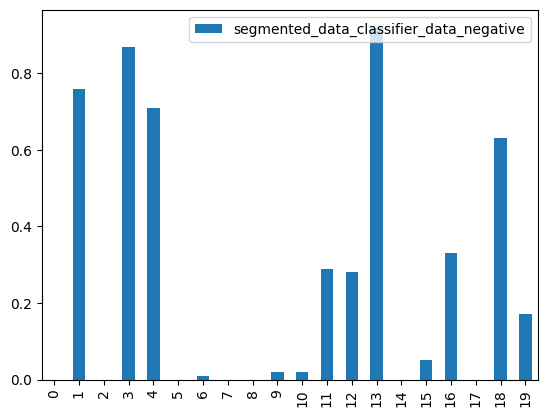

In [59]:
dataframe[['segmented_data_classifier_data_negative']].astype('float').plot.bar()